In [1]:
# Импорт библиотек для работы с таблицами данных
import numpy as np
import pandas as pd

# Для визуализации данных
from matplotlib import pyplot as plt

# Библиотеки для масштабирования данных, кластеризации, классификации и регрессии
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
# Считываем данные по белому вину
original_data = pd.read_csv("./winequality-white.csv", sep=";")

In [3]:
# Всего там 11 столбцов признаков, все непрерывные, + столбец целевых значений
original_data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
# Отбрасываем столбце значений качества в отдельную переменную, остальные
# признаки в переменную X - по ней и кластеризуем
data = original_data.copy()
X = data.drop("quality", axis="columns")
y = data.quality

In [5]:
# Определяем качества вина с помощью случайного леса. Это преследует две цели
# - проверить, будут ли кластеры более чистыми с точки зрения предсказанных значений
#   качества, чем с точки зрения истинных
# - Отобрать несколько наиболее важных признаков и посмотреть, что будет, если кластеризовать
#   уже по ним
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)
reg = ExtraTreesRegressor(max_depth=5, random_state=0)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
y_pred = reg.predict(X)

0.3291828202724755
0.3247875187576794


In [6]:
# Смотрим, какие признаки для этой модели наиболее важны
pd.Series(reg.feature_importances_, index=X.columns)

fixed acidity           0.010160
volatile acidity        0.155223
citric acid             0.025320
residual sugar          0.012630
chlorides               0.031896
free sulfur dioxide     0.086152
total sulfur dioxide    0.028227
density                 0.045817
pH                      0.009071
sulphates               0.009087
alcohol                 0.586417
dtype: float64

In [7]:
# Отбираем 3 наиболее важных
X2 = data[["alcohol", "volatile acidity", "sulphates"]]

In [8]:
# Готовим таблицу для хранения данных о чистоте кластеров
# Для каждого метода кластеризации в этой таблице будет
# - Признак обучения с учителем, что означает обучения на подмножестве
#   признаков, отобранных как самые важные для модели с учителем.
#   Такие кластеры, к сожалению, нельзя назвать полученными полностью
#   без учителя
# - Количество кластеров
# - Максимальный из размеров кластеров.
# - Минимальный из размеров кластеров
# - Максимальное качество кластера. То есть, для каждого кластера
#   берется среднее качество вина, попавшего в этот кластер, а
#   потом берется максимум по всем кластерам
# - Минимальное качество кластера. То есть, для каждого кластера
#   берется среднее качество вина, попавшего в этот кластер, а
#   потом берется минимум по всем кластерам
# - Максимальное предсказанное качество кластера. То есть, для каждого кластера
#   берется среднее предсказанное случайным лесом качество вина, попавшего в
#   этот кластер, а потом берется максимум по всем кластерам
# - Минимальное предсказанное качество кластера. То есть, для каждого кластера
#   берется среднее предсказанное случайным лесом качество вина, попавшего в
#   этот кластер, а потом берется минимум по всем кластерам
# Последние два значения помогут определитт, что кластеризация определяет
# лучше - кластеры однородные в плане истинного качетва вина или в плане
# качества, которое предсказывает обученная с учителем модель
def createScoreboard():
    return pd.DataFrame(
        columns=[
            "С учителем",
            "Количество кластеров",
            "Максимальный размер кластера",
            "Минимальный размер кластера",
            "Максимальное среднее качество по кластеру",
            "Минимальное среднее качество по кластеру",
            "Максимальное предсказанное среднее качество по кластеру",
            "Минимальное предсказанное среднее качество по кластеру",
        ]
    )

REGRESSION_CLUSTER_RESULTS = createScoreboard()

# А теперь - функция, предназначенная для добавления строк в эту
# таблицу
def tryClusterer(description, reg, clusters, results, supervised=False):
    """
    На основании разбиения данных на кластеры запоминает в таблице results
    метрики качества этого разбиения
    
    Параметры
    ---------
    description: str
        Описание метода бинарной кластеризации
    
    reg: sklearn.BaseEstimator
        Регрессор, с предсказаниями которого сравниваем кластеры

    clusters: array-like, shape=(len(X))
        Массив с метками кластеров, каждый элемент соответствует строке
        исходных данных

    results:
        Таблица, в которую записывается результат, формат соответствует
        таблице REGRESSION_CLUSTER_RESULTS

    supervised: bool, по умолучанию False
        Если True, то это кластеры, посторенные на признаках, отобранных
        с помощью модели с учителем
    """
    labels = set(clusters)
    clusters = pd.Series(clusters, index=data.index)
    # В дополнение к истинным значениям качества, смотрим как будут
    # распределены предсказанные случайным лесом
    y_pred = pd.Series(reg.predict(X), index=data.index)
    results.loc[description, "С учителем"] = supervised
    results.loc[description, "Количество кластеров"] = len(labels)
    min_size = None
    max_size = None
    min_quality = None
    max_quality = None
    min_predicted = None
    max_predicted = None
    for label in labels:
        # Для каждого кластера определяем его размер, среднее качество
        # вина в нем и среднее предсказанное случайным лесом качество.
        size = len(data.loc[clusters == label])
        quality = y.loc[clusters == label].mean()
        predicted = y_pred.loc[clusters == label].mean()
        # Потом для каждого из этих значений заносим в таблицу эго
        # максимум и минимум по всем кластерам
        if min_size is None:
            min_size = size
        else:
            min_size = min(min_size, size)
        if max_size is None:
            max_size = size
        else:
            max_size = max(max_size, size)
        if min_quality is None:
            min_quality = quality
        else:
            min_quality = min(min_quality, quality)
        if max_quality is None:
            max_quality = quality
        else:
            max_quality = max(max_quality, quality)
        if min_predicted is None:
            min_predicted = predicted
        else:
            min_predicted = min(min_predicted, predicted)
        if max_predicted is None:
            max_predicted = predicted
        else:
            max_predicted = max(max_predicted, predicted)
    results.loc[description, "Максимальный размер кластера"] = max_size
    results.loc[description, "Минимальный размер кластера"] = min_size
    results.loc[description, "Максимальное среднее качество по кластеру"] = max_quality
    results.loc[description, "Минимальное среднее качество по кластеру"] = min_quality
    results.loc[description, "Максимальное предсказанное среднее качество по кластеру"] = max_predicted
    results.loc[description, "Минимальное предсказанное среднее качество по кластеру"] = min_predicted

In [9]:
# Если бы вино идеально разделилось на кластеры с хорошим и плохим поровну,
# каким было бы среднее качество хорошего вина, и каким среднее качество
# плохого
tryClusterer(
    "Идеальный вариант",
    reg,
    y >= y.median(),
    REGRESSION_CLUSTER_RESULTS,
    True
)
tryClusterer(
    "Идеальный вариант для предсказанного качества",
    reg,
    y_pred >= pd.Series(y_pred).median(),
    REGRESSION_CLUSTER_RESULTS,
    True
)
# Делим на 2, 3 или 4 кластера метдом K средних
tryClusterer(
    "K-средних/2 класса",
    reg,
    KMeans(n_clusters=2).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/3 класса",
    reg,
    KMeans(n_clusters=3).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/4 класса",
    reg,
    KMeans(n_clusters=4).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
# Используем предварительное масштабирование данных, также метод K-средних
tryClusterer(
    "K-средних/2 класса/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=2))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/3 класса/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/3 класса/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
# Делим на 2, 3 или 4 кластера метдом агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса",
    reg,
    AgglomerativeClustering(n_clusters=2).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/3 класса",
    reg,
    AgglomerativeClustering(n_clusters=3).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/4 класса",
    reg,
    AgglomerativeClustering(n_clusters=4).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
# Используем предварительное масштабирование данных, также метод агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=2))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
# Агломеративная кластеризация с пороговым значением размера кластера
tryClusterer(
    "Агломеративная/Порог 25/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=25))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/Порог 50/масштабирование",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=50))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)

In [10]:
# Далее все то же самое, но используем только признаки, отобранные
# моделю с учителем. Три наиболее важных 
# Делим на 2, 3 или 4 кластера метдом K средних
tryClusterer(
    "K-средних/2 класса/3 признака",
    reg,
    KMeans(n_clusters=2).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/3 класса/3 признака",
    reg,
    KMeans(n_clusters=3).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/4 класса/3 признака",
    reg,
    KMeans(n_clusters=4).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
# Используем предварительное масштабирование данных, также метод K-средних
tryClusterer(
    "K-средних/2 класса/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=2))
        ]
    ).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/3 класса/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/3 класса/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
# Делим на 2, 3 или 4 кластера метдом агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса/3 признака",
    reg,
    AgglomerativeClustering(n_clusters=2).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/3 класса/3 признака",
    reg,
    AgglomerativeClustering(n_clusters=3).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/4 класса/3 признака",
    reg,
    AgglomerativeClustering(n_clusters=4).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
# Используем предварительное масштабирование данных, также метод агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=2))
        ]
    ).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X2),
    REGRESSION_CLUSTER_RESULTS,
    supervised=True
)
# Агломеративная кластеризация с пороговым значением размера кластера
tryClusterer(
    "Агломеративная/Порог 25/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=25))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/Порог 50/масштабирование/3 признака",
    reg,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=50))
        ]
    ).fit_predict(X),
    REGRESSION_CLUSTER_RESULTS
)

In [11]:
# Смотрим таблицу результатов
REGRESSION_CLUSTER_RESULTS.sort_values(["С учителем", "Количество кластеров"])

,С учителем,Количество кластеров,Максимальный размер кластера,Минимальный размер кластера,Максимальное среднее качество по кластеру,Минимальное среднее качество по кластеру,Максимальное предсказанное среднее качество по кластеру,Минимальное предсказанное среднее качество по кластеру
K-средних/2 класса,False,2,2800,2098,6.00964,5.7021,5.99589,5.71618
K-средних/2 класса/масштабирование,False,2,2938,1960,6.06127,5.60306,6.0488,5.61718
Агломеративная/2 класса,False,2,3014,1884,6.00531,5.6741,5.9845,5.70264
Агломеративная/2 класса/масштабирование,False,2,2933,1965,5.98807,5.71349,6.00238,5.68756
K-средних/3 класса,False,3,1986,1114,6.00278,5.55655,6.01782,5.62884
Агломеративная/3 класса,False,3,1884,1437,6.03479,5.6741,6.04688,5.70264
K-средних/4 класса,False,4,1724,730,6.04176,5.54932,6.01803,5.59186
K-средних/3 класса/масштабирование,False,4,1697,107,6.14583,5.48598,6.06008,5.50677
Агломеративная/4 класса,False,4,1577,670,6.03479,5.52388,6.04688,5.57975
Агломеративная/3 класса/масштабирование,False,4,1892,80,6.02484,5.4375,6.01109,5.49519


In [13]:
# Метрика качества кластеризации - берем разность между средним качеством по
# кластеру с максимальным и минимальным средним качеством, делим на такую
# же разницу для идеального разделения. Эта метрика равна 1 для кластеров,
# идеально отделяющих хорошие вина от плохих и 0 для кластеров, в каждом
# из которых среднее качество вина одинаково. Заметим, что сравнивать по
# этой метрике можно только алгоритмы с одинаковым числом кластеров, так
# как большое число маленьких кластеров, естественно, дает более мелкие
# кластеры
REGRESSION_CLUSTER_RESULTS[
    "Качество кластеризации для истинного качества вина"
] = (REGRESSION_CLUSTER_RESULTS[
    "Максимальное среднее качество по кластеру"
] - REGRESSION_CLUSTER_RESULTS[
    "Минимальное среднее качество по кластеру"
]) / (REGRESSION_CLUSTER_RESULTS.loc[
    "Идеальный вариант", "Максимальное среднее качество по кластеру"
] - REGRESSION_CLUSTER_RESULTS.loc[
    "Идеальный вариант", "Минимальное среднее качество по кластеру"
])

REGRESSION_CLUSTER_RESULTS[
    "Качество кластеризации для предсказанного качества вина"
] = (REGRESSION_CLUSTER_RESULTS[
    "Максимальное предсказанное среднее качество по кластеру"
] - REGRESSION_CLUSTER_RESULTS[
    "Минимальное предсказанное среднее качество по кластеру"
]) / (REGRESSION_CLUSTER_RESULTS.loc[
    "Идеальный вариант для предсказанного качества", "Максимальное предсказанное среднее качество по кластеру"
] - REGRESSION_CLUSTER_RESULTS.loc[
    "Идеальный вариант для предсказанного качества", "Минимальное предсказанное среднее качество по кластеру"
])


In [14]:
# Смотрим таблицу результатов. При этом группируем результаты по признаку обучения
# с учителем, так как нельзя сравнивать результаты, полученные с учителем и без,
# и по количеству кластеров
REGRESSION_CLUSTER_RESULTS.sort_values(
    ["С учителем", "Количество кластеров", "Качество кластеризации для истинного качества вина"]
)

,С учителем,Количество кластеров,Максимальный размер кластера,Минимальный размер кластера,Максимальное среднее качество по кластеру,Минимальное среднее качество по кластеру,Максимальное предсказанное среднее качество по кластеру,Минимальное предсказанное среднее качество по кластеру,Качество кластеризации для истинного качества вина,Качество кластеризации для предсказанного качества вина
Агломеративная/2 класса/масштабирование,False,2,2933,1965,5.98807,5.71349,6.00238,5.68756,0.182335,0.496319
K-средних/2 класса,False,2,2800,2098,6.00964,5.7021,5.99589,5.71618,0.204225,0.440956
Агломеративная/2 класса,False,2,3014,1884,6.00531,5.6741,5.9845,5.70264,0.21994,0.444356
K-средних/2 класса/масштабирование,False,2,2938,1960,6.06127,5.60306,6.0488,5.61718,0.30427,0.680436
Агломеративная/3 класса,False,3,1884,1437,6.03479,5.6741,6.04688,5.70264,0.23952,0.542703
K-средних/3 класса,False,3,1982,1118,6.00278,5.55725,6.01782,5.62934,0.295857,0.612436
K-средних/4 класса,False,4,1712,756,6.04731,5.5463,6.01733,5.59357,0.332699,0.668058
Агломеративная/4 класса,False,4,1577,670,6.03479,5.52388,6.04688,5.57975,0.339271,0.736438
Агломеративная/3 класса/масштабирование,False,4,1892,80,6.02484,5.4375,6.01109,5.49519,0.390023,0.813314
K-средних/3 класса/масштабирование,False,4,1697,107,6.14329,5.48598,6.05868,5.50677,0.436487,0.870084


In [15]:
# Посмотрим теперь, насколько чистые кластеры получаются с позиций классификации
# вин на хорошие (качество 6 и более) и плохие (5 и менее)

# Сохраняем оригинальные данные, делаем копию
data = original_data.copy()
# И преобразуем задачу к классификации вин на хорошие и плохие. Так они
# расбиваются примерно на 2 класса
# Отбрасываем столбце значений качества в отдельную переменную, остальные
# признаки в переменную X - по ней и кластеризуем
X = data.drop("quality", axis="columns")
y = (data.quality > 5).astype(int)

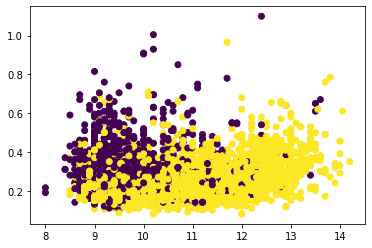

In [16]:
# Посмотрим визуально, как тут могут выглядеть кластеры
plt.scatter(data["alcohol"], data["volatile acidity"], c=y)

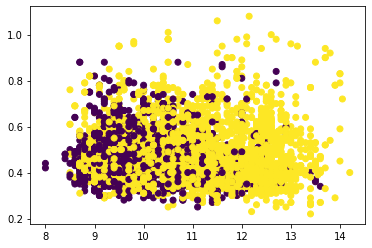

In [17]:
plt.scatter(data["alcohol"], data["sulphates"], c=y)

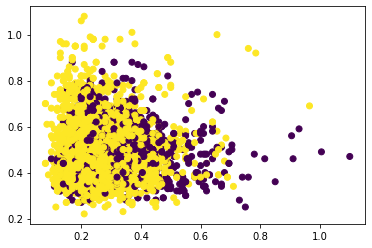

In [18]:
plt.scatter(data["volatile acidity"], data["sulphates"], c=y)

In [19]:
# Создаем новую таблицу результатов для чистоты кластеризации
BINARY_CLUSTER_RESULTS = createScoreboard()

# Определяем классы вина с помощью случайного леса. Это нужно, чтобы
# проверить, будут ли кластеры более чистыми с точки зрения предсказанных значений
# классов, чем с точки зрения истинных
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, stratify=y)
clf = ExtraTreesClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
y_pred = clf.predict(X)

0.7100462836918051
0.6995918367346938


In [20]:
# Если бы вино идеально разделилось на кластеры с хорошим и плохим поровну,
# каким было бы среднее качество хорошего вина, и каким среднее качество
# плохого
tryClusterer(
    "Идеальный вариант",
    clf,
    y > 0,
    BINARY_CLUSTER_RESULTS,
    True
)
tryClusterer(
    "Идеальный вариант для предсказанного качества",
    clf,
    y_pred > 0,
    BINARY_CLUSTER_RESULTS,
    True
)
# Делим на 2, 3 или 4 кластера метдом K средних
tryClusterer(
    "K-средних/2 класса",
    clf,
    KMeans(n_clusters=2).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/3 класса",
    clf,
    KMeans(n_clusters=3).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/4 класса",
    clf,
    KMeans(n_clusters=4).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
# Используем предварительное масштабирование данных, также метод K-средних
tryClusterer(
    "K-средних/2 класса/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=2))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/3 класса/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "K-средних/3 класса/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
# Делим на 2, 3 или 4 кластера метдом агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса",
    clf,
    AgglomerativeClustering(n_clusters=2).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/3 класса",
    clf,
    AgglomerativeClustering(n_clusters=3).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/4 класса",
    clf,
    AgglomerativeClustering(n_clusters=4).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
# Используем предварительное масштабирование данных, также метод агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=2))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
# Агломеративная кластеризация с пороговым значением размера кластера
tryClusterer(
    "Агломеративная/Порог 25/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=25))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/Порог 50/масштабирование",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=50))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)

In [21]:
# Далее все то же самое, но используем только признаки, отобранные
# моделю с учителем. Три наиболее важных 
# Делим на 2, 3 или 4 кластера метдом K средних
tryClusterer(
    "K-средних/2 класса/3 признака",
    clf,
    KMeans(n_clusters=2).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/3 класса/3 признака",
    clf,
    KMeans(n_clusters=3).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/4 класса/3 признака",
    clf,
    KMeans(n_clusters=4).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
# Используем предварительное масштабирование данных, также метод K-средних
tryClusterer(
    "K-средних/2 класса/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=2))
        ]
    ).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/3 класса/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "K-средних/3 класса/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', KMeans(n_clusters=4))
        ]
    ).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
# Делим на 2, 3 или 4 кластера метдом агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса/3 признака",
    clf,
    AgglomerativeClustering(n_clusters=2).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/3 класса/3 признака",
    clf,
    AgglomerativeClustering(n_clusters=3).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/4 класса/3 признака",
    clf,
    AgglomerativeClustering(n_clusters=4).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
# Используем предварительное масштабирование данных, также метод агломеративной кластеризации
tryClusterer(
    "Агломеративная/2 класса/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=2))
        ]
    ).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
tryClusterer(
    "Агломеративная/3 класса/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=4))
        ]
    ).fit_predict(X2),
    BINARY_CLUSTER_RESULTS,
    supervised=True
)
# Агломеративная кластеризация с пороговым значением размера кластера
tryClusterer(
    "Агломеративная/Порог 25/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=25))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)
tryClusterer(
    "Агломеративная/Порог 50/масштабирование/3 признака",
    clf,
    Pipeline(
        [
            ('scale', StandardScaler()),
            ('cluster', AgglomerativeClustering(n_clusters=None, distance_threshold=50))
        ]
    ).fit_predict(X),
    BINARY_CLUSTER_RESULTS
)

In [22]:
# Метрика качества кластеризации - берем разность между средним качеством по
# кластеру с максимальным и минимальным средним качеством, делим на такую
# же разницу для идеального разделения. Эта метрика равна 1 для кластеров,
# идеально отделяющих хорошие вина от плохих и 0 для кластеров, в каждом
# из которых среднее качество вина одинаково. Заметим, что сравнивать по
# этой метрике можно только алгоритмы с одинаковым числом кластеров, так
# как большое число маленьких кластеров, естественно, дает более мелкие
# кластеры
BINARY_CLUSTER_RESULTS[
    "Качество кластеризации для истинного качества вина"
] = (BINARY_CLUSTER_RESULTS[
    "Максимальное среднее качество по кластеру"
] - BINARY_CLUSTER_RESULTS[
    "Минимальное среднее качество по кластеру"
]) / (BINARY_CLUSTER_RESULTS.loc[
    "Идеальный вариант", "Максимальное среднее качество по кластеру"
] - BINARY_CLUSTER_RESULTS.loc[
    "Идеальный вариант", "Минимальное среднее качество по кластеру"
])

BINARY_CLUSTER_RESULTS[
    "Качество кластеризации для предсказанного качества вина"
] = (BINARY_CLUSTER_RESULTS[
    "Максимальное предсказанное среднее качество по кластеру"
] - BINARY_CLUSTER_RESULTS[
    "Минимальное предсказанное среднее качество по кластеру"
]) / (BINARY_CLUSTER_RESULTS.loc[
    "Идеальный вариант для предсказанного качества", "Максимальное предсказанное среднее качество по кластеру"
] - BINARY_CLUSTER_RESULTS.loc[
    "Идеальный вариант для предсказанного качества", "Минимальное предсказанное среднее качество по кластеру"
])


In [23]:
# Смотрим таблицу результатов. При этом группируем результаты по признаку обучения
# с учителем, так как нельзя сравнивать результаты, полученные с учителем и без,
# и по количеству кластеров
BINARY_CLUSTER_RESULTS.sort_values(
    ["С учителем", "Количество кластеров", "Качество кластеризации для истинного качества вина"]
)

,С учителем,Количество кластеров,Максимальный размер кластера,Минимальный размер кластера,Максимальное среднее качество по кластеру,Минимальное среднее качество по кластеру,Максимальное предсказанное среднее качество по кластеру,Минимальное предсказанное среднее качество по кластеру,Качество кластеризации для истинного качества вина,Качество кластеризации для предсказанного качества вина
Агломеративная/2 класса/масштабирование,False,2,2933,1965,0.71599,0.589313,0.958063,0.905344,0.126677,0.0527199
K-средних/2 класса,False,2,2800,2098,0.733214,0.574357,0.9675,0.896092,0.158858,0.0714085
Агломеративная/2 класса,False,2,3014,1884,0.727605,0.565287,0.967485,0.888004,0.162318,0.0794808
K-средних/2 класса/масштабирование,False,2,2941,1957,0.752805,0.53347,0.975179,0.879407,0.219336,0.0957713
Агломеративная/3 класса,False,3,1884,1437,0.757133,0.565287,0.970772,0.888004,0.191846,0.0827682
K-средних/3 класса,False,3,1977,1125,0.740535,0.503111,0.967706,0.868444,0.237423,0.0992616
K-средних/4 класса,False,4,1725,732,0.73971,0.510929,0.971014,0.842896,0.228781,0.128118
Агломеративная/3 класса/масштабирование,False,4,1892,80,0.719345,0.475,0.993276,0.6,0.244345,0.393276
Агломеративная/4 класса,False,4,1577,670,0.757133,0.485075,0.970772,0.831343,0.272058,0.139429
K-средних/3 класса/масштабирование,False,4,1698,107,0.786634,0.485981,0.977428,0.588785,0.300653,0.388643


In [24]:
print("""
Выводы
------
* Среди моделей обучения без учителя, разделяющих на 2 кластера, лучшая имеет качество 0.45,
  это агломеративная модель с приведением всех признаков к единому масштабу. Заметим, что
  предсказаннае случайным лесом значения качества вина эта модель предсказывает намного
  лучше - с качеством 0.7. По этой метрике она также лучшая

* Из моделей кластеризации, обученных по трем специально отобранным признакам, лучшей является
  также агломеративная кластеризация, также с приведением признаков к единому масштабу. Она имеет качество
  0.57 для разделения по истинному качеству вина и 0.94 для разделения по предсказанному случайным
  лесом качеству вина. То есть значения качества вина, предсказанные случайным лесом, в этом
  случае разделяются почти идеально. Но это модель не совсем без учителя

* Визуально выраженных кластеров не просматривается, хотя в целом решающую границу в координатах
  alcohol - volatile - sulphates более или менее видно

* Если значения качества вина по десятибалльной шкале заменить на бинарный признак хорошее (6
  и более) или плохое (5 и менее) то также лучшей моделью кластеризации на 2 класса будет
  агломеративная кластеризация, причем приведение признаков к единому масштабу парадокасльно
  ухудшило чистоту кластеризации, хотя и улучшило чистоту кластеризации в плане предсказанного
  моделью с учителем качества вина. Агломеративная кластеризация в этом случае имеет качество
  0.33, против 0.32 для агломеративной кластеризации с приведением признаков к единому масштабу.
  Впрочем, эта модель дает сильно несбалансированные кластеры - в малом всего 210 элементов,
  отсюда, видимо, перекос.
* Для агломеративной кластеризации с приведением к единому масштабу
  кластеры несколько более сбалансированы, хотя все равно один в два с лишним раза больше
  другого. При этом в одном из кластеров хорошие 75 процентов вин (и при этом 89 процентов
  вин определенных случайным лесом как хорошие), второй более смешанный.

* Для кластеризации по трем признакам лучшей оказалась модель агломеративной кластеризации
  с приведением признаков к единому масштабу с качеством 0.42. В одном из класеров при этом
  81 процент вин хорошие (и 92 процента классифицированы как хорошие), в другом 39 процентов.
""")


Выводы
------
* Среди моделей обучения без учителя, разделяющих на 2 кластера, лучшая имеет качество 0.45,
  это агломеративная модель с приведением всех признаков к единому масштабу. Заметим, что
  предсказаннае случайным лесом значения качества вина эта модель предсказывает намного
  лучше - с качеством 0.7. По этой метрике она также лучшая

* Из моделей кластеризации, обученных по трем специально отобранным признакам, лучшей является
  также агломеративная кластеризация, также с приведением признаков к единому масштабу. Она имеет качество
  0.57 для разделения по истинному качеству вина и 0.94 для разделения по предсказанному случайным
  лесом качеству вина. То есть значения качества вина, предсказанные случайным лесом, в этом
  случае разделяются почти идеально. Но это модель не совсем без учителя

* Визуально выраженных кластеров не просматривается, хотя в целом решающую границу в координатах
  alcohol - volatile - sulphates более или менее видно

* Если значения качества вина по